In [1]:
%pylab inline
import pandas as pd
import scanpy as sc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
Ext_Monkey = sc.read('../data_h5/Ext_230821.h5ad')
Ext_Monkey

AnnData object with n_obs × n_vars = 21733 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cluster_labels', 'sampleLayers'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cluster_labels_colors', 'cluster_names', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', 'X_umapraw'
    varm: 'PCs'
    layers: 'RawCounts'
    obsp: 'connectivities', 'distances'

In [3]:
ad_hodge = sc.read_csv('./dataH5/FI_layer5_count_data.csv')
dataInfo_hodge= pd.read_csv('./dataH5/FI_layer5_sample_information.csv')

In [4]:
ad_hodge.obs_names = dataInfo_hodge['sample_id']

In [5]:
ad_hodge.X

array([[  0.,   0.,   0., ...,   7.,  16., 131.],
       [  0.,   0.,   0., ...,   8.,   8.,  36.],
       [  0.,   0.,   1., ..., 101.,  12.,  16.],
       ...,
       [  0.,   0.,   0., ...,   0.,   1.,   1.],
       [  0.,   0.,   0., ...,   0.,   0., 112.],
       [  0.,   0.,   0., ...,   0.,   0., 341.]], dtype=float32)

In [6]:
tem_cluster_type_id = dataInfo_hodge['cluster_type_id']
tem_cluster_type_id = tem_cluster_type_id.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_type_id'] = tem_cluster_type_id

tem_cluster_type_label = dataInfo_hodge['cluster_type_label']
tem_cluster_type_label = tem_cluster_type_label.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_type_label'] = tem_cluster_type_label

tem_cluster_type_color = dataInfo_hodge['cluster_type_color']
tem_cluster_type_color = tem_cluster_type_color.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_type_color'] = tem_cluster_type_color

tem_cluster_id = dataInfo_hodge['cluster_id']
tem_cluster_id = tem_cluster_id.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_id'] = tem_cluster_id

tem_cluster_label = dataInfo_hodge['cluster_label']
tem_cluster_label = tem_cluster_label.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_label'] = tem_cluster_label

tem_cluster_color = dataInfo_hodge['cluster_color']
tem_cluster_color = tem_cluster_color.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_color'] = tem_cluster_color

In [7]:
clusterNameDict_hu = dict={
    'cl32_i11_C1QL2_Ndnf.Cxcl14'        :   'Inh LAMP5 CRH',                 # 
    'cl36_i7_NKX2-1_Igtp'               :   'Inh LAMP5 SFRP1',           # 
    'cl13_i24_VIP_Vip.Mybpc1'           :   'Inh VIP',            # 
    'cl1_i74_DCN_Sst.Tacstd2'           :   'Inh SST',           # 
    'cl9_i29_WNT16_Pvalb.Rspo2'         :   'Inh LHX6 WINT16',        #  

    'cl2_e72_ADAMTS9-AS1_L2.Ngb'        :   'Exc LINC00507 CARM1P1',          #  
    'cl7_e33_FRMD6-AS2_L6.Syt17'        :   'Exc THEMIS WISP1',       #  
    'cl19_e19_GABRE_L6.Syt17'           :   'Exc RORB TAGLN2',         #  
    'cl4_e52_CCDC68_L5a.Deptor_Pacsin2' :   'Exc RORB CAPN5',         #  
    'cl12_e24_TRAV8-3_L5a.Syt17'        :   'Exc RORB LIPH',         #      
    'cl6_e36_SLC38A11_L6.Syt17'         :   'Exc RORB SLC38A11',         #  
    'cl26_e13_KL_L6a.Plcxd3'            :   'Exc CTGF ELL3',         #  
    'cl15_e23_ITGA4_L5b.Cdh13'          :   'Exc FEZF2 GABRQ',
    'cl31_e11_SMYD1_L2.3.Otof'          :   'Exc THEMIS SMYD1',         #  
    'cl37_e6_SCUBE1_L6a.Plcxd3'         :   'Exc CTGF LIX1',         #      
    'cl35_e8_CFH_L6a.Plcxd3'            :   'Exc CTGF CFH',         #  
    'cl14_e24_CD200R1L_L6a.Plcxd3'      :   'Exc FEZF2 CASC18',         #      
    'cl18_e20_IL26_L6a.Plcxd3'          :   'Exc FEZF2 GPX3',         #      
}
ad_hodge.obs['clusterName_hodge'] = ad_hodge.obs['cluster_label'].map(clusterNameDict_hu).astype('category')

In [8]:
ad_hodge = ad_hodge[ad_hodge[ad_hodge.obs['cluster_type_label']=='exc'].obs_names,]

In [9]:
genes = ad_hodge.var_names[ad_hodge.var_names.isin(Ext_Monkey.var_names)]
genes

Index(['A1BG', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT', 'AAAS', 'AACS', 'AADAC',
       'AADACL3', 'AADAT',
       ...
       'ZSWIM7', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11A',
       'ZYG11B', 'ZYX', 'ZZEF1'],
      dtype='object', length=14629)

In [10]:
ad_mk = Ext_Monkey.layers['RawCounts']
ad_mk.obs['leiden'] = Ext_Monkey.obs['leiden']
ad_mk.obs['cluster_labels'] = Ext_Monkey.obs['cluster_labels']
ad_mk.uns['leiden_colors'] = Ext_Monkey.uns['leiden_colors']
ad_mk.obsm['X_umap'] = Ext_Monkey.obsm['X_umap']
ad_mk

AnnData object with n_obs × n_vars = 21733 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'leiden', 'cluster_labels'
    var: 'gene_ids', 'feature_types'
    uns: 'leiden_colors'
    obsm: 'X_umap'

In [11]:
ad_hu = ad_hodge[:,genes]
ad_hu

View of AnnData object with n_obs × n_vars = 341 × 14629
    obs: 'cluster_type_id', 'cluster_type_label', 'cluster_type_color', 'cluster_id', 'cluster_label', 'cluster_color', 'clusterName_hodge'

In [12]:
ad_mk.obs['species'] = 'monkey'
ad_hu.obs['species'] = 'human'

In [13]:
ad_mk.obs['batch_10X'] = ad_mk.obs['batch']
ad_hu.obs['batch_hodge'] = 'batch_hodge'

In [14]:
adata = ad_mk.concatenate(ad_hu,index_unique = None)
adata.var['mt'] = adata.var_names.isin(["ND1","ND2","COX1","COX2","COX3","ATP6","ATP8","ND3","ND4","ND5","ND6","ND4L","CYTB"])

batch_all = adata.obs['batch'].astype(str)
batch_all[adata.obs_names.isin(ad_mk.obs_names)] = ad_mk.obs['batch_10X'].astype(str)
batch_all[adata.obs_names.isin(ad_hu.obs_names)] = ad_hu.obs['batch_hodge'].astype(str)
adata.obs['batch'] = batch_all.astype('category')

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [16]:
del(adata.obs['predicted_doublets'])

In [17]:
adata.write('./data_tem/merge_MKinsular_HodegeFI_Ext_step1.h5ad',compression='gzip')

### Run scanpy……

In [18]:
# adata = sc.read('./data_tem/merge_MKinsular_HodegeFI_Ext_step1.h5ad')

In [19]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [20]:
adata.obs['species']

AAACCTGGTAGCTGCC-1-batch-1                     monkey
AAACCTGGTCAGAGGT-1-batch-1                     monkey
AAACGGGTCTGCCCTA-1-batch-1                     monkey
AAAGATGGTGTATGGG-1-batch-1                     monkey
AAAGCAACACTTACGA-1-batch-1                     monkey
                                                ...  
N07_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4     human
N08_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4     human
N09_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5     human
N10_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4     human
N11_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5     human
Name: species, Length: 22074, dtype: category
Categories (2, object): ['human', 'monkey']

In [21]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [22]:
sc.pp.highly_variable_genes(
    adata,
    batch_key="batch",
    flavor="seurat",
    n_top_genes=500,
    subset=True,
    min_mean=0.015, 
    max_mean=10,
    min_disp=0.05
)
adata = adata[:, adata.var.highly_variable]

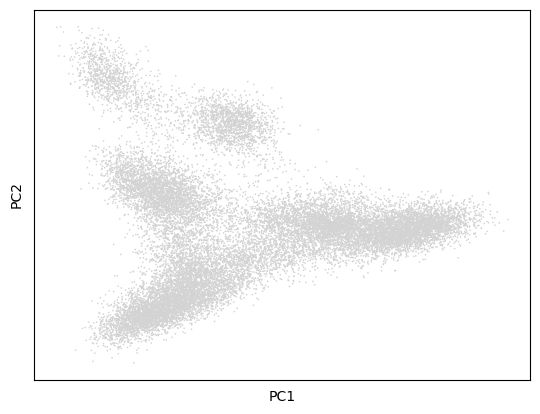

In [23]:
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

In [24]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

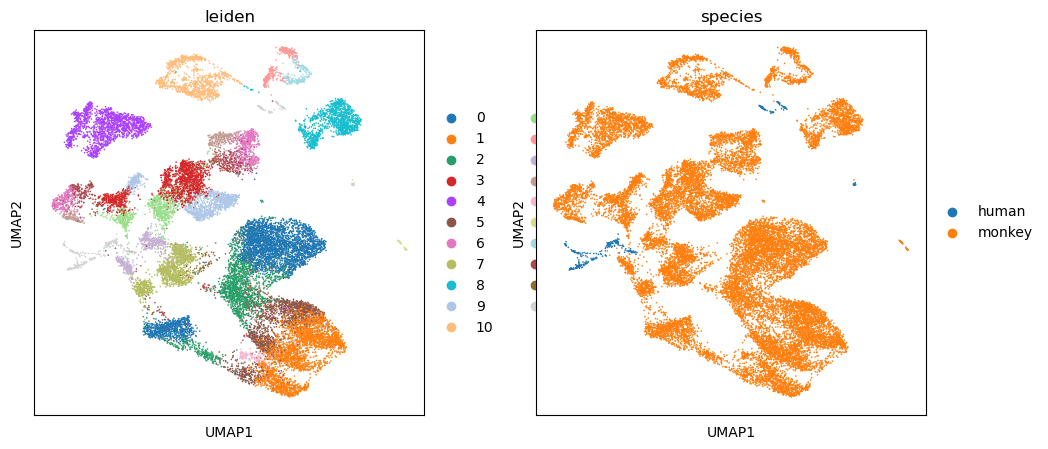

In [25]:
figsize(5,5)
sc.pl.umap(adata,color=['leiden','species'])

In [26]:
adata.write('./data_tem/merge_MKinsular_HodegeFI_Ext_step2.h5ad',compression='gzip')

### Integrate with harmoney

In [27]:
# adata=sc.read('./data_tem/merge_MKinsular_HodegeFI_Ext_step2.h5ad')

In [28]:
adata.obs['batch']

AAACCTGGTAGCTGCC-1-batch-1                         batch-1
AAACCTGGTCAGAGGT-1-batch-1                         batch-1
AAACGGGTCTGCCCTA-1-batch-1                         batch-1
AAAGATGGTGTATGGG-1-batch-1                         batch-1
AAAGCAACACTTACGA-1-batch-1                         batch-1
                                                  ...     
N07_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4    batch_hodge
N08_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4    batch_hodge
N09_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5    batch_hodge
N10_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4    batch_hodge
N11_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5    batch_hodge
Name: batch, Length: 22074, dtype: category
Categories (23, object): ['batch-1', 'batch-10', 'batch-11', 'batch-12', ..., 'batch-7', 'batch-8', 'batch-9', 'batch_hodge']

In [29]:
import harmonypy as hm
ho = hm.run_harmony(adata.obsm['X_pca'], adata.obs, ['batch'])

adata.obsm['X_harmonypca'] = ho.Z_corr.T
sc.pp.neighbors(adata, use_rep='X_harmonypca')

adata.obsm['X_umapraw'] = adata.obsm['X_umap']
sc.tl.umap(adata)
adata.obsm['X_umapharmony'] = adata.obsm['X_umap']

2025-03-01 12:25:10,956 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-01 12:25:17,599 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-01 12:25:17,762 - harmonypy - INFO - Iteration 1 of 10
2025-03-01 12:25:24,183 - harmonypy - INFO - Iteration 2 of 10
2025-03-01 12:25:30,655 - harmonypy - INFO - Iteration 3 of 10
2025-03-01 12:25:35,885 - harmonypy - INFO - Iteration 4 of 10
2025-03-01 12:25:39,719 - harmonypy - INFO - Iteration 5 of 10
2025-03-01 12:25:42,224 - harmonypy - INFO - Converged after 5 iterations


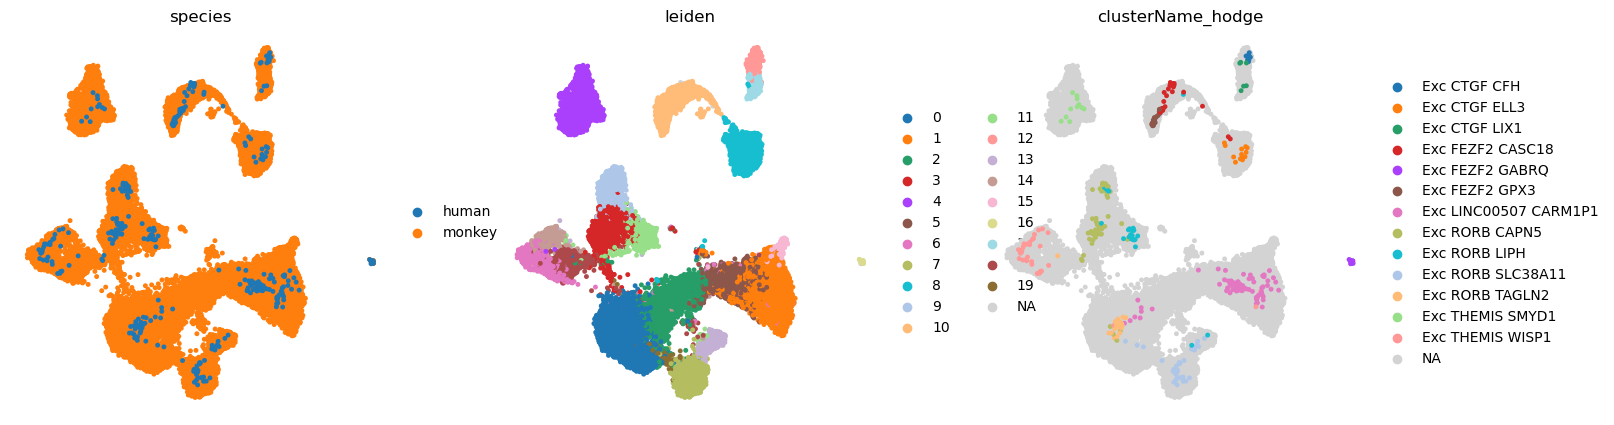

In [30]:
figsize(5,5)
sc.pl.umap(adata, color=['species','leiden','clusterName_hodge'],ncols=3, frameon=False, legend_loc='right margin', size=50)

In [31]:
adata.write('./data_tem/merge_MKinsular_HodegeFI_Ext_step3.h5ad',compression='gzip')

# Comparision heatmap plotting

In [32]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [33]:
import sys
sys.path.append('../tools')
from two_species_heatmap import *

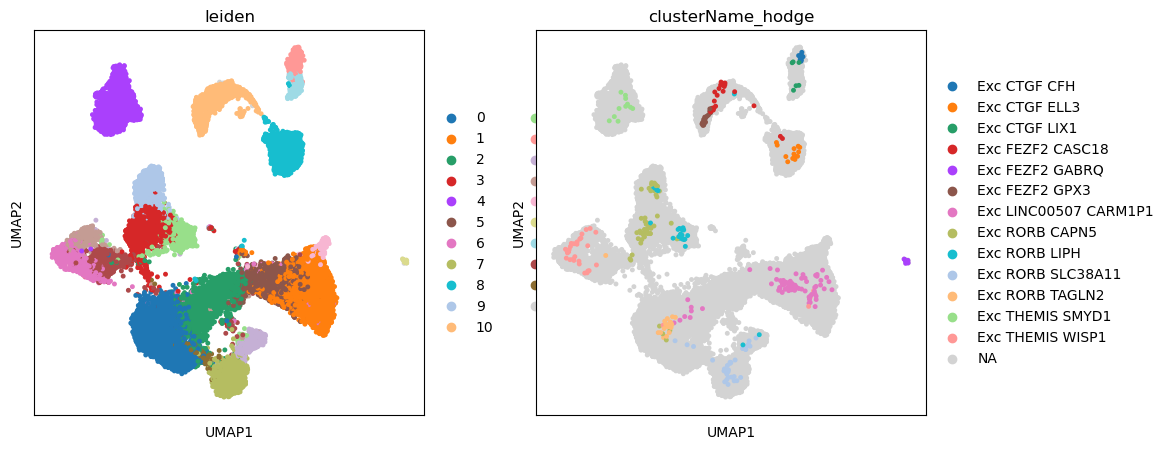

In [34]:
sc.pl.umap(adata, color = ['leiden','clusterName_hodge'],size=50)

In [35]:
sc.pp.neighbors(adata,  metric='euclidean',use_rep = 'X_harmonypca' )
sc.tl.louvain(adata, resolution = 1.8, key_added = 'louvain')
adata.obs['louvain1_8'] = adata.obs['louvain']

In [36]:
ad_2 = adata[adata.obs['species'].isin(['human']),:]
ad_2.obs['clusterName_hodge']

A01_1_Nuclei_NeuNP_H200_1025_FI_layer5_BCH7            Exc RORB LIPH
A01_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5         Exc THEMIS WISP1
A02_BCH2_1NeuNP_H200.1025_FI_layer_5                   Exc RORB LIPH
A04_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH8          Exc FEZF2 GABRQ
A06_1_Nuclei_NeuNP_H200_1025_FI_layer5_BCH6    Exc LINC00507 CARM1P1
                                                       ...          
N07_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4         Exc THEMIS WISP1
N08_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4         Exc FEZF2 CASC18
N09_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5         Exc FEZF2 CASC18
N10_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4        Exc RORB SLC38A11
N11_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5            Exc RORB LIPH
Name: clusterName_hodge, Length: 341, dtype: category
Categories (13, object): ['Exc CTGF CFH', 'Exc CTGF ELL3', 'Exc CTGF LIX1', 'Exc FEZF2 CASC18', ..., 'Exc RORB SLC38A11', 'Exc RORB TAGLN2', 'Exc THEMIS SMYD1', 'Exc THEMIS WISP1']

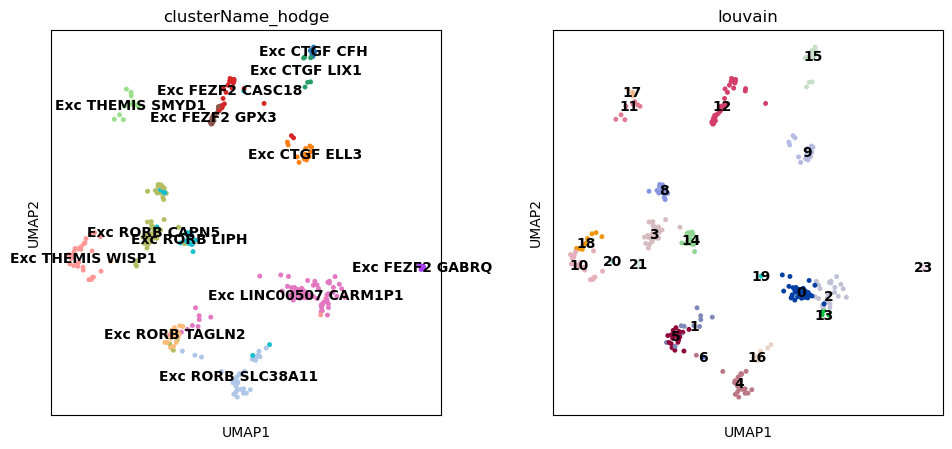

In [37]:
figsize(5,5)
sc.pl.umap(ad_2, color = ['clusterName_hodge','louvain'], legend_loc = 'on data',size=50)

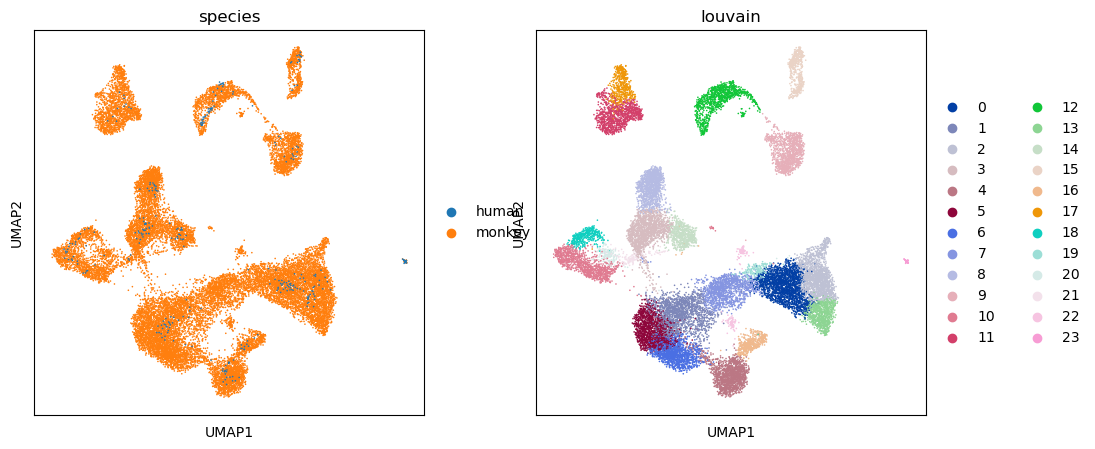

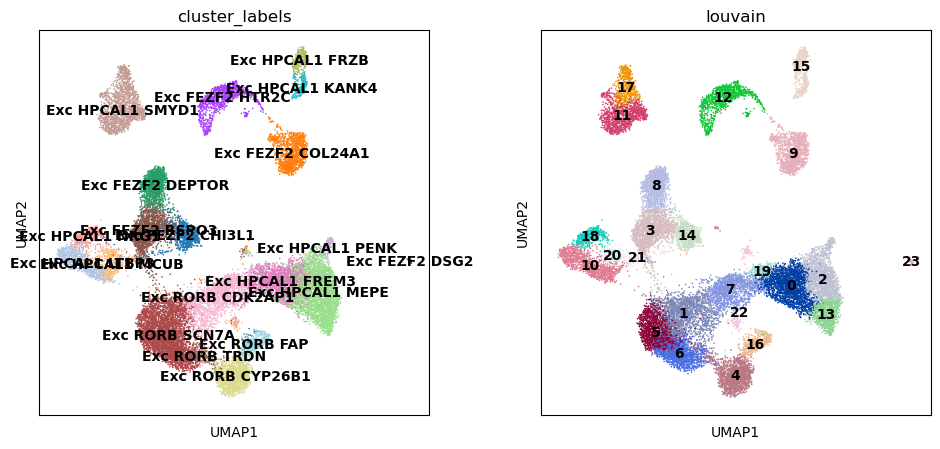

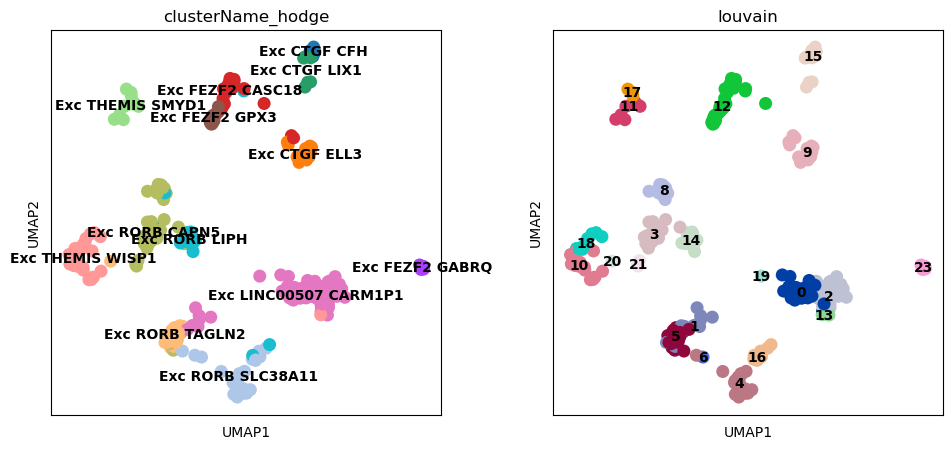

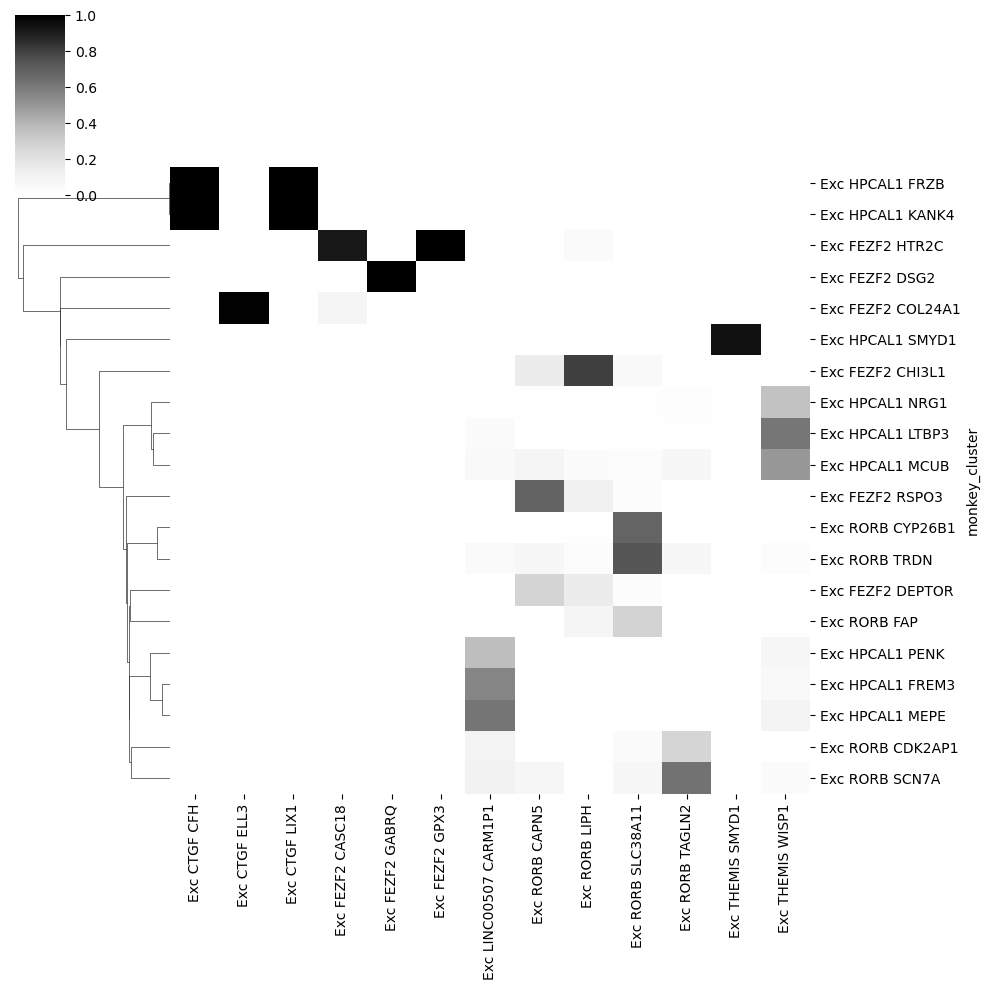

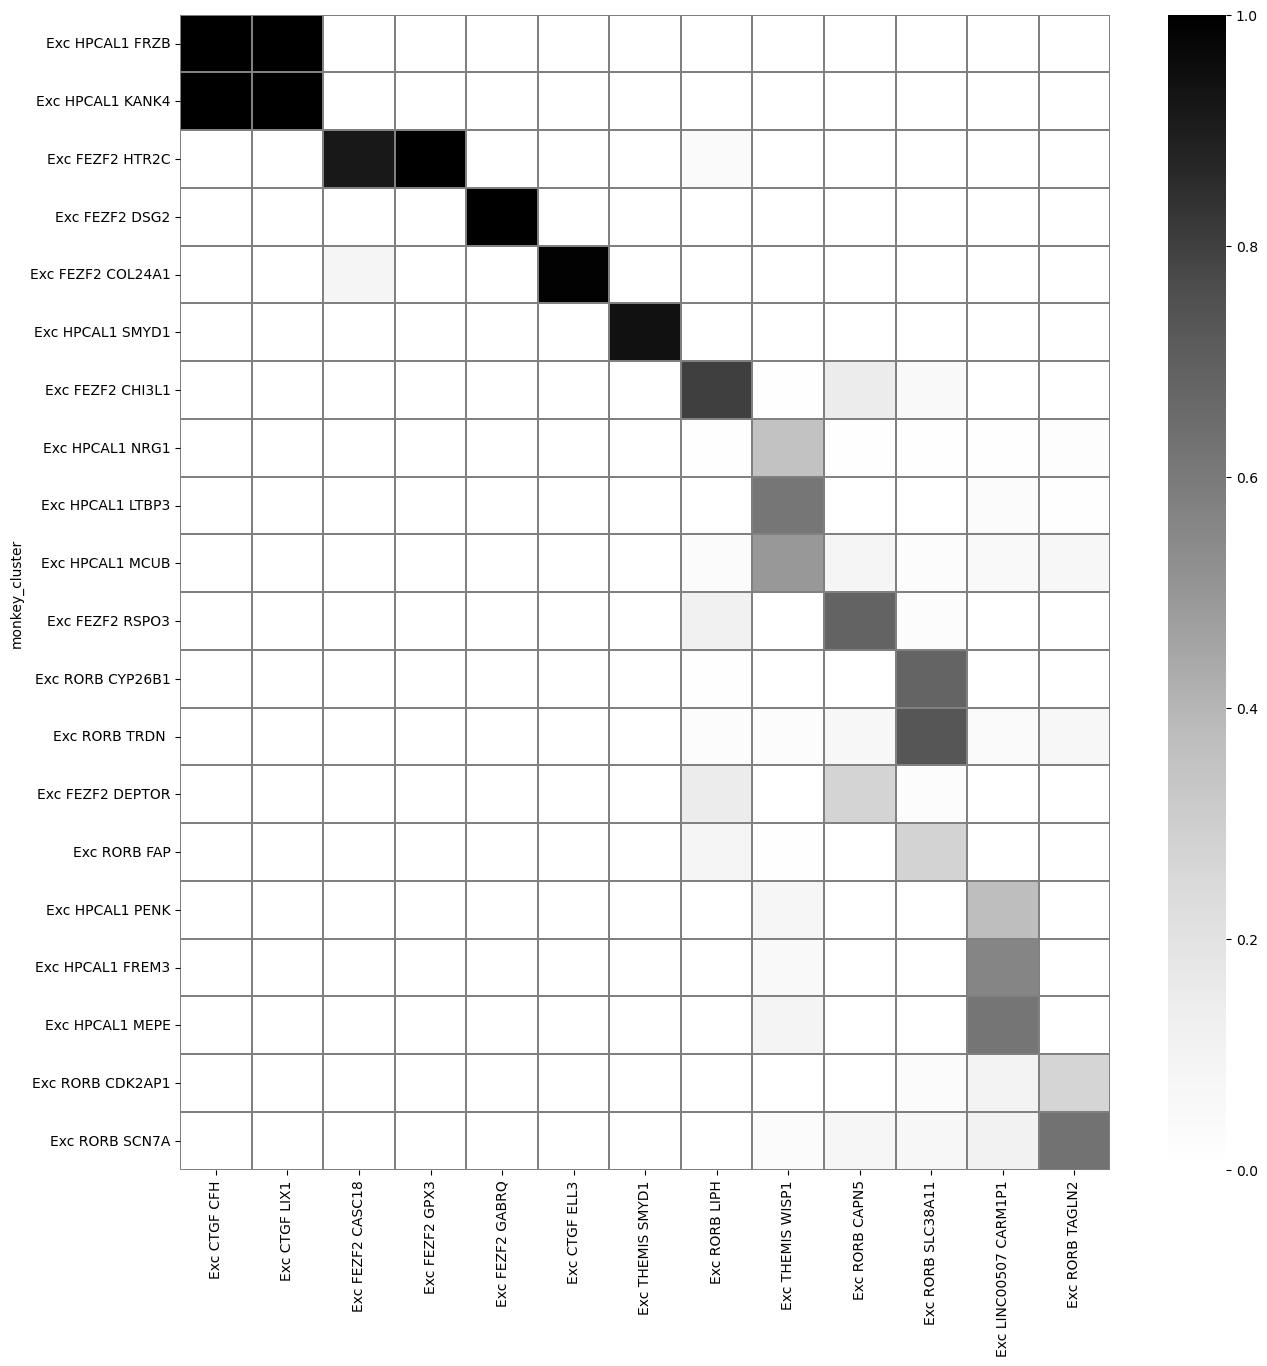

In [38]:
plot_matrix_mk_vs_hu_lovain_1_8 = two_species_heatmap(adata, species_1 = 'monkey', species_2 = 'human',\
                species_1_key = 'cluster_labels', species_2_key = 'clusterName_hodge',louvain = 1.8)

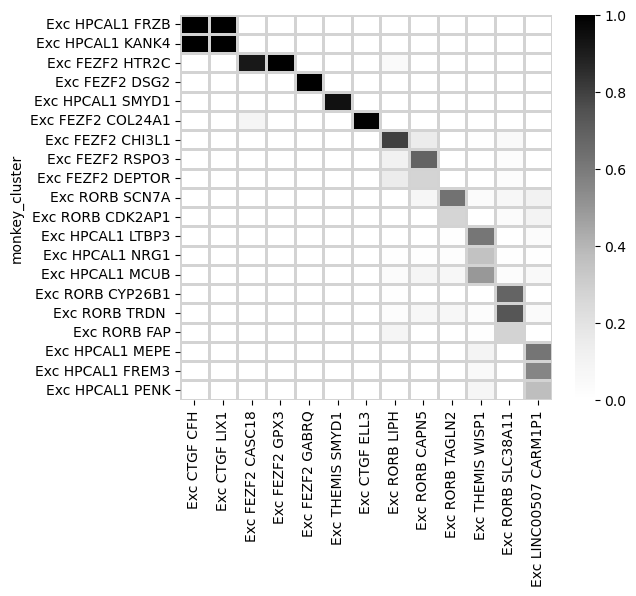

In [39]:
# re-assign the index and columns
ind_order = ['Exc HPCAL1 FRZB', 'Exc HPCAL1 KANK4', 'Exc FEZF2 HTR2C',
       'Exc FEZF2 DSG2', 'Exc HPCAL1 SMYD1', 'Exc FEZF2 COL24A1',
       'Exc FEZF2 CHI3L1', 'Exc FEZF2 RSPO3','Exc FEZF2 DEPTOR', 
       'Exc RORB SCN7A', 'Exc RORB CDK2AP1', 
       'Exc HPCAL1 LTBP3', 'Exc HPCAL1 NRG1', 'Exc HPCAL1 MCUB',
       'Exc RORB CYP26B1', 'Exc RORB TRDN ', 'Exc RORB FAP',
       'Exc HPCAL1 MEPE', 'Exc HPCAL1 FREM3', 
       'Exc HPCAL1 PENK']
col_order = ['Exc CTGF CFH', 'Exc CTGF LIX1', 'Exc FEZF2 CASC18', 'Exc FEZF2 GPX3',
       'Exc FEZF2 GABRQ', 'Exc THEMIS SMYD1', 'Exc CTGF ELL3',
       'Exc RORB LIPH', 'Exc RORB CAPN5', 'Exc RORB TAGLN2', 
       'Exc THEMIS WISP1', 'Exc RORB SLC38A11', 'Exc LINC00507 CARM1P1']
plot_matrix_mk_vs_hu_lovain_1_8 = plot_matrix_mk_vs_hu_lovain_1_8.reindex(index=ind_order, columns=col_order)

plt.figure(figsize = (6,5))
sns_plot = sns.heatmap(plot_matrix_mk_vs_hu_lovain_1_8, cmap='Greys', cbar=True, xticklabels=1,yticklabels=1, linewidth = 1, linecolor = 'lightgray')
plt.savefig('figures/cmpMatrix_mk_vs_hu_500VirableGenes.pdf',dpi = 600, )

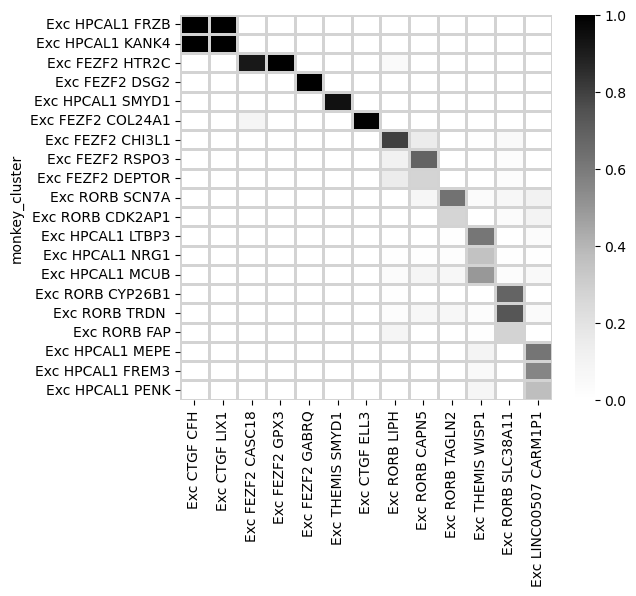

In [40]:
plt.figure(figsize = (6,5))
sns_plot = sns.heatmap(plot_matrix_mk_vs_hu_lovain_1_8, cmap='Greys', cbar=True, xticklabels=1,yticklabels=1, linewidth = 1, linecolor = 'lightgrey')

In [41]:
# set the first level markers groups...(used the louvain=1.8)
subclass_markers = adata.obs['species'].astype(str)
subclass_markers[adata.obs['louvain'].isin(['0','2','11','13','15','19'])] = 'HPCAL1'
subclass_markers[adata.obs['louvain'].isin(['3','8','9','12','14','23'])] = 'FEZF2'
subclass_markers[adata.obs['louvain'].isin(['1','4','5','6','7','16','22'])] = 'RORB'
adata.obs['subclass_markers'] = subclass_markers.astype('category')

adata.uns['subclass_markers_colors'] = np.array([ '#008000', '#98A14E', '#2E8B57', '#96C390', '#6FBC1E', '#6D9269',
                                                  '#90EE90', '#224700', '#228B22', '#00FF7F', '#ADD8E6', '#4666A6',
                                                  '#1E90FF', '#B4BA77', '#1B655D', '#008B8B', '#00CED1', '#20B2AA',
                                                  '#66CDAA', '#00FF00',])



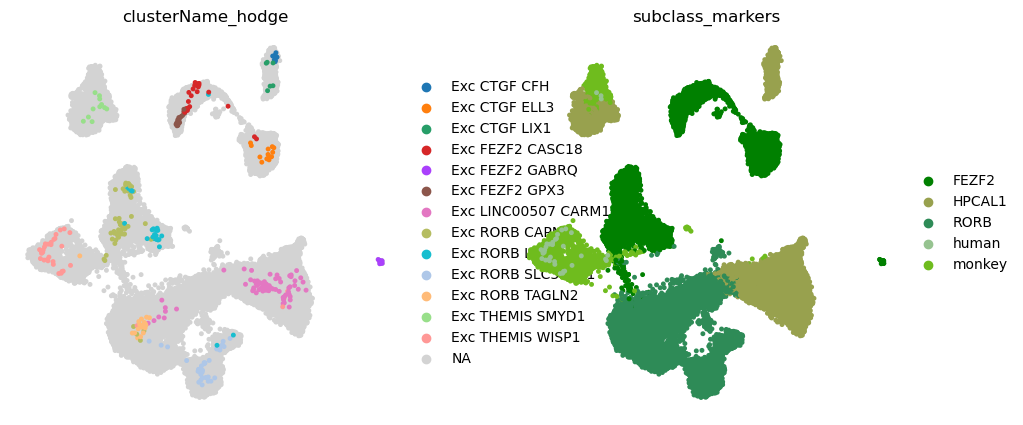

In [42]:
figsize(5,5)
sc.pl.umap(adata, color = ['clusterName_hodge','subclass_markers'],size=50,frameon='',save='Integrate_humanFI_Ext_to_10XExt.pdf')

In [43]:
adata.uns['df_clusterCmpMatrix_louvain_1_8'] = plot_matrix_mk_vs_hu_lovain_1_8
adata.write('./data_tem/merge_MKinsular_HodegeFI_Ext_final.h5ad',compression='gzip')